<a href="https://colab.research.google.com/github/vineetbiyani09/NLP/blob/master/NLP_5_Spam_Assignment_J010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk.stem
from nltk.stem import LancasterStemmer

In [3]:
import pandas as pd
messages = pd.read_csv('/content/spam.csv' , encoding='latin-1')

In [4]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
messages.shape

(5572, 5)

In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Dropped the columns, can be appended to increase accuracy

In [7]:
messages = messages.iloc[:,[0,1]]

In [8]:
messages.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

All messages in lower text 

In [10]:
messages['v1'] = messages['v1'].str.lower()
messages['v2'] = messages['v2'].str.lower()

In [11]:
messages.head()

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [12]:
messages.isnull().sum()

v1    0
v2    0
dtype: int64

In [13]:
messages['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

Word Cloud for EDA

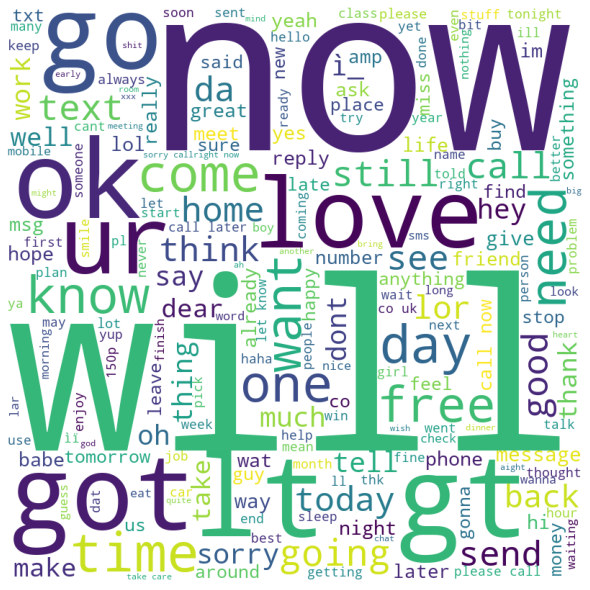

In [14]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in messages.v2: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


Imbalanced dataset 

In [15]:
from string import punctuation
from nltk.corpus import stopwords
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
corpus = messages['v2'].tolist()
len(corpus)
corpus = corpus[1:10000]

In [16]:
final_corpus = []
for i in range(len(corpus)):
  word = word_tokenize(corpus[i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)
#final_corpus

In [17]:
product_list=messages['v1'].tolist()
product_list=product_list[1:10000]
newdf = pd.DataFrame(final_corpus)
newdf['label'] = product_list
newdf.columns=['message','label']
newdf.head()

,message,label
0,ok lar ... jok wif u on ...,ham
1,fre entry 2 wkly comp win fa cup fin tkts 21st...,spam
2,u dun say ear hor ... u c already say ...,ham
3,nah n't think goe usf liv around though,ham
4,freemsg hey darl 's 3 week 's word back 'd lik...,spam


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(newdf['message'])
x_train = vector.toarray()
print(x_train)
y_train= newdf['label']

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
x_train.shape

(5571, 6985)

In [20]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_train, y_train)

print('original dataset shape:', x_rus.shape)
print('Resample dataset shape', x_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


original dataset shape: (1494, 6985)
Resample dataset shape (5571, 6985)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [22]:
from sklearn.naive_bayes import MultinomialNB
ab = MultinomialNB()
ab.fit(x_train,y_train)
ypred = ab.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))


ytestpred = ab.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ytestpred))
print(confusion_matrix(y_test,ytestpred))
print(classification_report(y_test,ytestpred))

0.9857740585774059
[[592  10]
 [  7 586]]
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       602
        spam       0.98      0.99      0.99       593

    accuracy                           0.99      1195
   macro avg       0.99      0.99      0.99      1195
weighted avg       0.99      0.99      0.99      1195

0.9665551839464883
[[141   4]
 [  6 148]]
              precision    recall  f1-score   support

         ham       0.96      0.97      0.97       145
        spam       0.97      0.96      0.97       154

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
ypred = clf.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

ytestpred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ytestpred))
print(confusion_matrix(y_test,ytestpred))
print(classification_report(y_test,ytestpred))

1.0
[[602   0]
 [  0 593]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       602
        spam       1.00      1.00      1.00       593

    accuracy                           1.00      1195
   macro avg       1.00      1.00      1.00      1195
weighted avg       1.00      1.00      1.00      1195

0.9130434782608695
[[140   5]
 [ 21 133]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92       145
        spam       0.96      0.86      0.91       154

    accuracy                           0.91       299
   macro avg       0.92      0.91      0.91       299
weighted avg       0.92      0.91      0.91       299



In [24]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)
ypred = classifier.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

ytestpred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ytestpred))
print(confusion_matrix(y_test,ytestpred))
print(classification_report(y_test,ytestpred))

0.99581589958159
[[602   0]
 [  5 588]]
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       602
        spam       1.00      0.99      1.00       593

    accuracy                           1.00      1195
   macro avg       1.00      1.00      1.00      1195
weighted avg       1.00      1.00      1.00      1195

0.9130434782608695
[[143   2]
 [ 24 130]]
              precision    recall  f1-score   support

         ham       0.86      0.99      0.92       145
        spam       0.98      0.84      0.91       154

    accuracy                           0.91       299
   macro avg       0.92      0.92      0.91       299
weighted avg       0.92      0.91      0.91       299



In [25]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))


ytestpred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ytestpred))
print(confusion_matrix(y_test,ytestpred))
print(classification_report(y_test,ytestpred))

0.9447698744769875
[[589  13]
 [ 53 540]]
              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       602
        spam       0.98      0.91      0.94       593

    accuracy                           0.94      1195
   macro avg       0.95      0.94      0.94      1195
weighted avg       0.95      0.94      0.94      1195

0.9163879598662207
[[141   4]
 [ 21 133]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92       145
        spam       0.97      0.86      0.91       154

    accuracy                           0.92       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.92      0.92      0.92       299



Regularization
Hyperparameter Tuning

Comparison of accuracy before and after handling imbalanced data using undersampling 

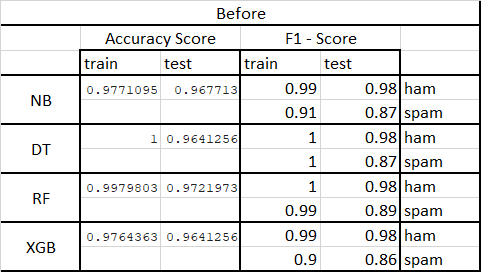

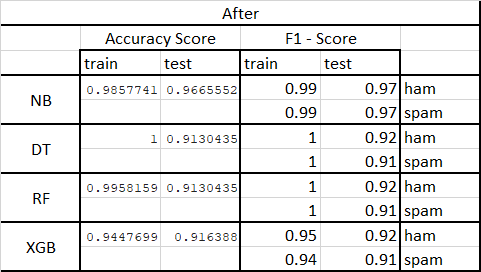